In [1]:
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr

import cartopy as cr
import cartopy.feature as cf
import cartopy.crs as ccrs

In [2]:
data = xr.open_dataset('cru_ts4.06.ymean.JJAS.pre.dat.nc')

In [3]:
data_spatial_mean = np.mean(data['pre'],axis=(1,2))

In [4]:
year=[]
for i in range (1901,2022):
    year.append(i)

In [5]:
data_spatial_mean_avg = np.mean(data_spatial_mean)

In [6]:
data_std = np.std(data_spatial_mean)

In [7]:
data_anom = data_spatial_mean - data_spatial_mean_avg

In [8]:
pos_anom = []
pos_year = []
for i in range(len(data_anom)):
    if data_anom[i] > data_std:
        pos_anom.append(data_anom[i])
        pos_year.append(1901+i)

neg_anom = []
neg_year = []
for i in range(len(data_anom)):
    if data_anom[i] < -data_std:
        neg_anom.append(data_anom[i])
        neg_year.append(1901+i)

nor_anom = []
nor_year = []
for i in range(len(data_anom)):
    if data_anom[i] < data_std and data_anom[i] > -data_std:
        nor_anom.append(data_anom[i])
        nor_year.append(1901+i)

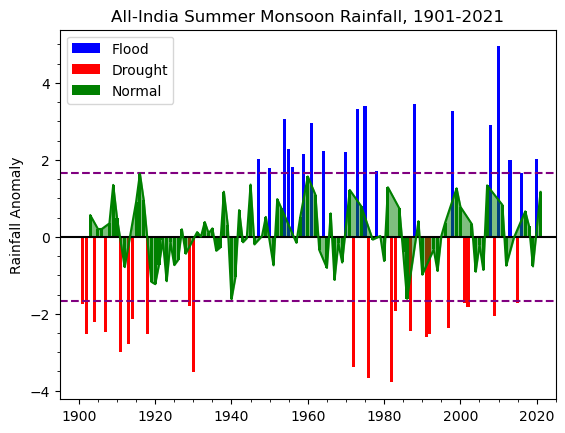

In [9]:
for i in range (len(data_anom)):
    if data_anom[i] > data_std:
        plt.bar(pos_year,pos_anom,color='blue')
    elif data_anom[i] < -data_std:
        plt.bar(neg_year,neg_anom,color='red')
    else:
        plt.bar(nor_year,nor_anom,color='green')
plt.axhline(y=data_std,linestyle='--',color='purple')
plt.axhline(y=-data_std,linestyle='--',color='purple')
plt.axhline(y=0,linestyle='-',color='black')
plt.bar(0,0,color='blue',label='Flood')
plt.bar(0,0,color='red',label='Drought')
plt.bar(0,0,color='green',label='Normal')
plt.plot(nor_year,nor_anom,'g-')
plt.fill_between(nor_year,nor_anom,color='green',alpha=0.5)

plt.title("All-India Summer Monsoon Rainfall, 1901-2021")
plt.ylabel("Rainfall Anomaly")
plt.minorticks_on()
plt.xlim(1895,2025)
plt.legend()
plt.savefig("./plots/All-India Summer Monsoon Rainfall, 1901-2021")